<a href="https://colab.research.google.com/github/ayush7237/python/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

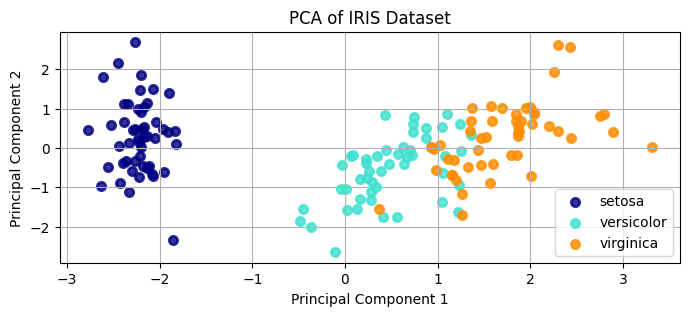

(150, 2)
(150, 4)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y


plt.figure(figsize=(8, 3))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(df_pca.loc[df_pca['Target'] == i, 'Principal Component 1'],
                df_pca.loc[df_pca['Target'] == i, 'Principal Component 2'],
                color=color, alpha=.8, lw=lw, label=target_name)

plt.title('PCA of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()

print(X_pca.shape)
print(X.shape)



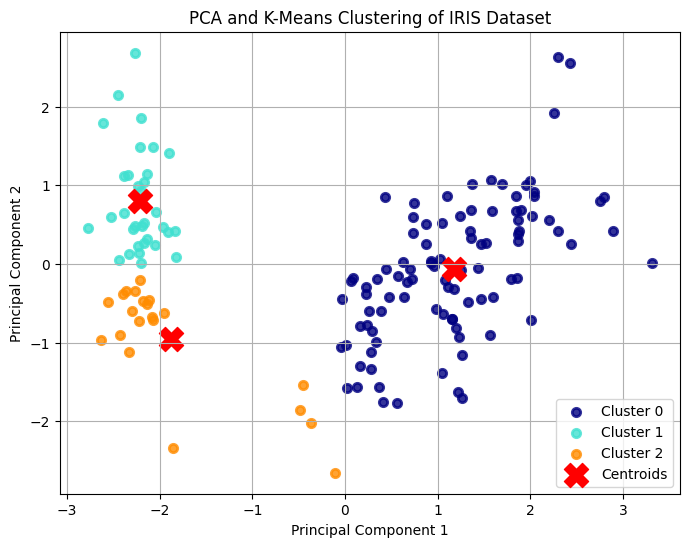

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)


df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = y_kmeans


plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i in zip(colors, range(3)):
    plt.scatter(df_pca.loc[df_pca['Cluster'] == i, 'Principal Component 1'],
                df_pca.loc[df_pca['Cluster'] == i, 'Principal Component 2'],
                color=color, alpha=.8, lw=lw, label=f'Cluster {i}')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('PCA and K-Means Clustering of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()